<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Использованные данные**:

- расстояние до ближайшего аэропорта в метрах (м)
- число балконов
- высота потолков (м)
- расстояние до центра города (м)
- сколько дней было размещено объявление (от публикации до снятия)
- дата публикации
- этаж
- всего этажей в доме
- апартаменты (булев тип)
- площадь кухни в квадратных метрах (м²)
- цена на момент снятия с публикации
- жилая площадь в квадратных метрах (м²)
- название населённого пункта
- свободная планировка (булев тип)
- число парков в радиусе 3 км
- расстояние до ближайшего парка (м)
- число водоёмов в радиусе 3 км
- расстояние до ближайшего водоёма (м)
- число комнат
- квартира-студия (булев тип)
- площадь квартиры в квадратных метрах (м²)
- число фотографий квартиры в объявлении

## Изучение данных из файла

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [237]:
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [239]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00000,23699.00000,23699.00000,23699.00000,14504.00000,23613.00000,21796.00000,23699.00000,21421.00000,12180.00000,18157.00000,18180.00000,18181.00000,8079.00000,18181.00000,9110.00000,20518.00000
mean,9.85848,6541548.77155,60.34865,2.07064,2.77150,10.67382,34.45785,5.89236,10.56981,1.15008,28793.67219,14191.27783,0.61141,490.80456,0.77025,517.98090,180.88863
std,5.68253,10887013.26754,35.65408,1.07840,1.26106,6.59717,22.03045,4.88525,5.90544,1.07130,12630.88062,8608.38621,0.80207,342.31799,0.93835,277.72064,219.72799
min,0.00000,12190.00000,12.00000,0.00000,1.00000,1.00000,2.00000,1.00000,1.30000,0.00000,0.00000,181.00000,0.00000,1.00000,0.00000,13.00000,1.00000
25%,6.00000,3400000.00000,40.00000,1.00000,2.52000,5.00000,18.60000,2.00000,7.00000,0.00000,18585.00000,9238.00000,0.00000,288.00000,0.00000,294.00000,45.00000
50%,9.00000,4650000.00000,52.00000,2.00000,2.65000,9.00000,30.00000,4.00000,9.10000,1.00000,26726.00000,13098.50000,0.00000,455.00000,1.00000,502.00000,95.00000
75%,14.00000,6800000.00000,69.90000,3.00000,2.80000,16.00000,42.30000,8.00000,12.00000,2.00000,37273.00000,16293.00000,1.00000,612.00000,1.00000,729.00000,232.00000
max,50.00000,763000000.00000,900.00000,19.00000,100.00000,60.00000,409.70000,33.00000,112.00000,5.00000,84869.00000,65968.00000,3.00000,3190.00000,3.00000,1344.00000,1580.00000


In [240]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [241]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

### Вывод

В данных дейтафрейма обнаружено следующее:
- в ячейках бОльшей части столбцов есть пропуски значений, позже примем решение, какие будем заполнять, какие  нет;
- название одного столбца надо исправить;
- есть аномальные значения (например, минимальная цена за квартиру и т.п.), наверняка они влияют на общую статистку;
- надо проверить наличие неявных дублей в названиях населенных пунктов;

## Предобработка данных

Поправим название столбца с **расстоянием до центра**.

In [242]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

df.columns


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В столбце **Балконы** заполним пустые строчки нолями, а данные переведем в целочисленный тип.

In [243]:
df['balcony'].value_counts(dropna = False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [244]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isnull().sum()

0

In [245]:
df['balcony'] = df['balcony'].astype(int)

В **названии населенного пункта** заполним пустые строки, а также устраним неявные дубли.

In [246]:
df['locality_name'] = df['locality_name'].fillna('unknown')
df['locality_name'].isnull().sum()

0

In [247]:
len(df['locality_name'].unique())

365

In [248]:
df_name_sorted = df['locality_name'].sort_values()
df_name_sorted.unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

In [249]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
print(len(df['locality_name'].unique()))

331


In [250]:
# replace_wrong_names('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
df['locality_name'] = df['locality_name'].str.replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
df['locality_name'] = df['locality_name'].str.replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')
df['locality_name'] = df['locality_name'].str.replace('городской поселок Мга', 'поселок городского типа Мга')
df['locality_name'] = df['locality_name'].str.replace('городской поселок Назия', 'поселок городского типа Назия')
df['locality_name'] = df['locality_name'].str.replace('городской поселок Павлово', 'поселок городского типа Павлово')
df['locality_name'] = df['locality_name'].str.replace('городской поселок Рощино', 'поселок городского типа Рощино')
df['locality_name'] = df['locality_name'].str.replace('городской поселок Советский', 'поселок городского типа Советский')

print(len(df['locality_name'].unique()))

324


В столбце с **общим количеством этажей дома** - заполним пустые значения, а также переведем данные в целочисленный тип. 

In [251]:
print('Количество объектов без указания этажности:', df['floors_total'].isnull().sum())

Количество объектов без указания этажности: 86


Посмотрим **медианные** значения количества этажей в Санкт-Петербурге и отдельно в областных городах и поселках. 

In [252]:
spb_floor_median = df.loc[df['locality_name'] == 'Санкт-Петербург', 'floor'].median()
non_spb_floor_median = df.loc[df['locality_name'] != 'Санкт-Петербург', 'floor'].median()
print('Медиана количества этажей, СПб:', spb_floor_median)
print('Медиана количества этажей, не СПб:', non_spb_floor_median)

Медиана количества этажей, СПб: 5.0
Медиана количества этажей, не СПб: 4.0


Заполним пустые ячейки медианными значениями этажей в зависимости от места расположения квартиры. 
При этом будем учитывать - если этаж квартиры **ниже** соответствующего медианного значения - укажем нужную медиану. 
Если **выше** - будем считать этаж квартиры "последним" для этого дома. 
Другого способа избежать проблемы "этаж квартиры больше медианного" мы не нашли. 

In [253]:
df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['floor'] <= spb_floor_median), 'floors_total'] = df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['floor'] <= spb_floor_median), 'floors_total'].fillna(spb_floor_median)

df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['floor'] > spb_floor_median), 'floors_total'] = df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['floor'] > spb_floor_median), 'floors_total'].fillna(df['floor'])

df.loc[(df['locality_name'] != 'Санкт-Петербург') & (df['floor'] <= non_spb_floor_median), 'floors_total'] = df.loc[(df['locality_name'] != 'Санкт-Петербург') & (df['floor'] <= non_spb_floor_median), 'floors_total'].fillna(non_spb_floor_median)

df.loc[(df['locality_name'] != 'Санкт-Петербург') & (df['floor'] > non_spb_floor_median), 'floors_total'] = df.loc[(df['locality_name'] != 'Санкт-Петербург') & (df['floor'] > non_spb_floor_median), 'floors_total'].fillna(df['floor'])


In [254]:
print('Количество объектов без указания этажности:', df['floors_total'].isnull().sum())

Количество объектов без указания этажности: 0


In [255]:
df['floors_total'] = df['floors_total'].astype(int)

В столбце **Площадь кухни** заполним пропуски. Переведем данные в целочисленный тип

In [256]:
print('Количество объектов без указания площади кухни:', df['kitchen_area'].isnull().sum())

Количество объектов без указания площади кухни: 2278


Будем считать, что в квартирах со **свободной планировкой** кухня является частью гостиной, а, значит, её площадь равна "0".

In [257]:
df.loc[df['open_plan'] == True, 'kitchen_area'] = df.loc[df['open_plan'] == True, 'kitchen_area'].fillna(0)
print('Количество объектов без указания площади кухни:', df['kitchen_area'].isnull().sum())

Количество объектов без указания площади кухни: 2211


Для остальных квратир (где кухня и жилое помещения отделены друг от друга) посчитаем площадь кухни, как **разницу** между общей площадью и жилой. 

In [258]:
def area_kitchen(df):
    if (np.isnan(df['kitchen_area'])) & (pd.notnull(df['living_area'])):
        return df['total_area'] - df['living_area']
    return df['kitchen_area']
df['kitchen_area'] = df.apply(area_kitchen, axis=1)
print('Количество объектов без указания площади кухни:', df['kitchen_area'].isnull().sum())

Количество объектов без указания площади кухни: 1459


Для квартир, где площадь **жилого помещения неизвестна**, применим медиану площади кухонь, ориентируясь на категорию дома. А категорию дома определим по этажности дома. 

In [259]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('floors_total')['kitchen_area'].transform("median"))
print('Количество объектов без указания площади кухни:', df['kitchen_area'].isnull().sum())

Количество объектов без указания площади кухни: 0


In [260]:
df['kitchen_area'] = df['kitchen_area'].astype(int)

В столбце **Жилая площадь** заполненим пропуска (через вычитание площади кухни из общей площади). 
Переведем даные в целочисленный тип.

In [261]:
def area_living(df):
    if np.isnan(df['living_area']):
        return df['total_area'] - df['kitchen_area']
    return df['living_area']
df['living_area'] = df.apply(area_living, axis=1)
print('Количество объектов без указания площади жилого помещения:', df['living_area'].isnull().sum())

Количество объектов без указания площади жилого помещения: 0


In [262]:
df['living_area'] = df['living_area'].astype(int)

В столбце **Высота потолков** заполним пропуски. Для этого используем медиану высоты потолков в зависимости от категори дома, а категорию дома определим по этажности дома.

In [263]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform("median"))
print('Количество объектов без указания высоты потолков:', df['ceiling_height'].isnull().sum())

Количество объектов без указания высоты потолков: 1


In [264]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())
print('Количество объектов без указания высоты потолков:', df['ceiling_height'].isnull().sum())

Количество объектов без указания высоты потолков: 0


**Цена недвижимости** и **общая площадь** - переведем данные в целочисленный тип.

In [265]:
df['last_price'] = df['last_price'].astype(int)
df['total_area'] = df['total_area'].astype(int)

В столбце **Дата размещения** - переведем данные в формат даты.

In [266]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  int32         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  int32         
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  int32         
 13  balcony         

Посмотрим, есть ли **дубликаты**.

In [267]:
print('Количество строк-дубликатов:', df.duplicated().sum())

Количество строк-дубликатов: 0


**Аномалии данных**

В первую очередь бросается в глаза наличие квартир с 3,4,5 балконами. Причем крайнее значение (5) встречается у 1,3% квартир, что вроде немного, но это третье место среди всех квартир с балконами. 

In [268]:
df['balcony'].value_counts(dropna = False)

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

В столбце 'last_price' минимальная цена за квартиру - 12190 р. Это аномальное значение, тк средняя цена кв. м. вторичной недвижимости в Ленинградской области в 2021-м г. было 80 т.р. Если учесть, что самая маленькая по площади недвижимость в датасете - 12 м2, то минимальная цена вряд ли может быть меньше нескольких сотен рублей. Посмотрим на выборку "дешевых" квартир.

In [269]:
df_low_price = df[df['last_price'] <= 450000]
df_low_price

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000,42,2017-07-31,2,2.80,1,23,1,NaN,...,5,0,городской поселок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
8793,7,12190,109,2019-03-20,2,2.75,25,32,25,NaN,...,40,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
9581,7,450000,43,2018-08-31,2,2.55,5,30,3,NaN,...,5,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
14911,5,430000,54,2018-06-26,2,2.80,3,46,3,NaN,...,8,0,поселок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16219,14,450000,38,2018-07-11,2,2.65,2,31,1,NaN,...,7,0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16274,18,440000,40,2018-07-10,1,2.55,5,33,1,NaN,...,7,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17456,7,430000,30,2019-04-22,1,2.70,2,16,1,NaN,...,6,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17676,0,450000,36,2018-02-01,1,2.55,5,17,4,NaN,...,8,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


Видно, что только **одно** значение является аномальным. После порога в 430000 р. цены становятся уже более адекватными рынку. 

Если говорить о количестве комнат, то у нас есть 197 объектов, где в этом столбце указано "0". 

In [270]:
display(df[df['rooms'] < 1])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27,2017-03-30,0,2.75,24,15,2,NaN,...,11,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000,25,2017-09-27,0,2.60,14,17,1,NaN,...,0,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000,27,2018-03-12,0,2.70,17,24,4,NaN,...,2,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000,34,2017-03-28,0,2.66,26,24,19,NaN,...,0,1,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000,25,2019-02-20,0,2.60,10,15,7,NaN,...,10,0,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26,2017-09-01,0,2.75,25,18,16,NaN,...,8,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000,27,2017-09-28,0,2.75,24,18,4,NaN,...,0,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000,26,2018-09-07,0,2.75,19,15,8,NaN,...,11,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000,29,2017-11-11,0,2.55,9,18,8,NaN,...,0,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Высота потолков. 3 объекта с высотой потолков менее 2 метров, и 37 объектов с высотой более 5 метров. 

In [271]:
display(df[df['ceiling_height'] < 2])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42,2017-08-14,2,1.20,2,27,1,NaN,...,5,0,поселок городского типа Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000,40,2017-10-17,1,1.75,37,17,5,NaN,...,8,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000,55,2018-10-31,2,1.00,12,32,7,NaN,...,10,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [272]:
display(df[df['ceiling_height'] > 5].sort_values(by='ceiling_height'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000,280,2015-06-11,6,5.20,8,159,7,NaN,...,21,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
12628,14,3900000,50,2018-03-29,1,5.30,5,43,5,NaN,...,7,0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
1026,20,155000000,310,2018-10-12,5,5.30,3,190,3,NaN,...,63,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
7578,17,38000000,143,2017-11-02,3,5.50,5,83,5,NaN,...,29,1,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1388,20,59800000,399,2015-01-21,5,5.60,6,388,6,NaN,...,11,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
21227,0,8200000,71,2017-07-21,0,5.80,5,68,5,NaN,...,3,0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
20264,17,119000000,187,2017-07-10,4,6.00,7,147,7,NaN,...,15,0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
3474,3,1400000,30,2018-03-16,1,8.00,5,15,2,False,...,7,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
15743,14,5600000,67,2016-11-11,3,8.00,16,41,1,NaN,...,8,0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000,54,2015-06-16,2,8.00,5,29,2,NaN,...,25,1,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0


Объем жилой площади - 22 объекта с жилой площадью менее 9 м2 (минимальная площадь на 1 человека по закону.) Это ошибка, поскольку объекты в большинстве строк - не загородная недвижимость, а квартиры в черте города или близко к нему (Шушары, Мурино). 

In [273]:
display(df[df['living_area'] < 9].sort_values(by='living_area'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21758,0,2330000,23,2018-01-01,0,2.75,24,2,22,NaN,...,21,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
13915,20,6350000,52,2018-02-06,2,3.00,6,2,2,NaN,...,9,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
23574,14,64990000,139,2015-11-24,3,3.00,8,3,8,NaN,...,16,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
3242,7,4440000,41,2017-07-02,1,2.70,17,3,17,NaN,...,11,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
21943,15,6100000,77,2019-02-28,4,2.50,9,5,1,NaN,...,9,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
17582,11,2680000,22,2018-08-11,0,2.75,25,5,8,NaN,...,17,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
22356,6,2050000,17,2019-01-13,1,2.77,23,6,1,False,...,11,0,Санкт-Петербург,33645.0,13513.0,0.0,NaN,0.0,NaN,7.0
19558,2,1686000,13,2018-12-17,1,2.55,5,6,1,NaN,...,7,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19546,3,1850000,13,2019-03-11,1,3.40,5,6,2,False,...,7,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19251,19,4050000,33,2018-10-15,1,2.50,22,6,21,NaN,...,18,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0


Посмотрим на объекты с аномальными показателями всей площади квартиры. Граница в 500 м2 взята из интервью с экспертами по петербургской недвижимости. 

In [274]:
display(df[df['total_area'] > 500].sort_values(by='total_area'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8018,20,84000000,507,2015-12-17,5,4.45,7,301,7,True,...,45,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
4237,1,50000000,517,2017-10-14,7,3.00,4,332,3,NaN,...,22,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000,590,2019-02-14,15,3.50,6,409,3,NaN,...,100,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
15651,20,300000000,618,2017-12-18,7,3.40,7,258,5,NaN,...,70,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
3117,19,140000000,631,2019-03-30,7,2.55,5,571,5,NaN,...,60,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12859,20,140000000,631,2019-04-09,7,3.90,4,322,4,NaN,...,19,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
19540,8,420000000,900,2017-12-06,12,2.80,25,409,25,NaN,...,112,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [275]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00000,23699.00000,23699.00000,23699.00000,23699.00000,23699.00000,23699.00000,23699.00000,23699.00000,23699.00000,18157.00000,18180.00000,18181.00000,8079.00000,18181.00000,9110.00000,20518.00000
mean,9.85848,6541548.77155,60.12051,2.07064,2.73594,10.67277,35.74737,5.89236,10.48441,0.59108,28793.67219,14191.27783,0.61141,490.80456,0.77025,517.98090,180.88863
std,5.68253,10887013.26754,35.66582,1.07840,0.99431,6.59440,25.04313,4.88525,6.64361,0.95930,12630.88062,8608.38621,0.80207,342.31799,0.93835,277.72064,219.72799
min,0.00000,12190.00000,12.00000,0.00000,1.00000,1.00000,2.00000,1.00000,0.00000,0.00000,0.00000,181.00000,0.00000,1.00000,0.00000,13.00000,1.00000
25%,6.00000,3400000.00000,40.00000,1.00000,2.55000,5.00000,19.00000,2.00000,7.00000,0.00000,18585.00000,9238.00000,0.00000,288.00000,0.00000,294.00000,45.00000
50%,9.00000,4650000.00000,52.00000,2.00000,2.65000,9.00000,30.00000,4.00000,9.00000,0.00000,26726.00000,13098.50000,0.00000,455.00000,1.00000,502.00000,95.00000
75%,14.00000,6800000.00000,69.00000,3.00000,2.75000,16.00000,43.00000,8.00000,12.00000,1.00000,37273.00000,16293.00000,1.00000,612.00000,1.00000,729.00000,232.00000
max,50.00000,763000000.00000,900.00000,19.00000,100.00000,60.00000,571.00000,33.00000,230.00000,5.00000,84869.00000,65968.00000,3.00000,3190.00000,3.00000,1344.00000,1580.00000


Сформируем новый дейтафрейм, в котором будут отсутствовать строки с выбивающимися значениями общей площади, цены, числа комнат, высоты потолков, времени продажи квартир и количества балконов. 

In [276]:
df_filtered = df.query('total_area < 120 \
and last_price > 400000 \
and last_price < 12500000 \
and ceiling_height > 2 \
and ceiling_height < 5 \
and days_exposition > 0 \
and days_exposition < 500\
and balcony < 5'\
                      )

df_filtered.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,13100.00000,13113.00000,13113.00000,5392.00000,13113.00000,6260.00000,17327.00000
mean,9.53593,4748706.29786,51.76580,1.87644,2.67818,10.98159,30.54129,6.00923,9.45871,0.54597,28992.94855,15012.47068,0.55037,486.08680,0.69992,536.40000,124.09159
std,5.54096,2177721.35260,17.78726,0.88063,0.18986,6.69345,13.71147,4.95981,4.20760,0.81538,13057.95759,8363.47757,0.76198,326.56744,0.88338,275.02833,117.60984
min,0.00000,430000.00000,12.00000,0.00000,2.20000,1.00000,2.00000,1.00000,0.00000,0.00000,0.00000,208.00000,0.00000,1.00000,0.00000,13.00000,1.00000
25%,6.00000,3300000.00000,38.00000,1.00000,2.55000,5.00000,18.00000,2.00000,7.00000,0.00000,18006.75000,10720.00000,0.00000,288.00000,0.00000,325.75000,40.00000
50%,9.00000,4300000.00000,48.00000,2.00000,2.65000,9.00000,29.00000,4.00000,9.00000,0.00000,27232.00000,13658.00000,0.00000,453.00000,0.00000,526.00000,80.00000
75%,13.00000,5800000.00000,62.00000,2.00000,2.75000,16.00000,39.00000,8.00000,11.00000,1.00000,37948.00000,16720.00000,1.00000,612.00000,1.00000,745.25000,177.00000
max,39.00000,12499000.00000,119.00000,6.00000,4.70000,60.00000,110.00000,33.00000,64.00000,4.00000,83758.00000,64857.00000,3.00000,3190.00000,3.00000,1344.00000,499.00000


## Расчёты и добавление результатов в таблицу

Посчитаем **цену квадратного метра** и создадим столбец с этими данными.

In [277]:
df_filtered = df_filtered.reset_index(drop=True)

df_filtered['price_sq_meter'] = df_filtered['last_price'] / df_filtered['total_area']
df_filtered['price_sq_meter'] = df_filtered['price_sq_meter'].astype(int)

Выделим столбцы с **годом, месяцем и днем недели** из данных о дате публикации.

In [278]:
df_filtered['year'] = pd.DatetimeIndex(df_filtered['first_day_exposition']).year
df_filtered['month'] = pd.DatetimeIndex(df_filtered['first_day_exposition']).month
df_filtered['day_weekday_pub'] = df_filtered['first_day_exposition'].dt.weekday

Создадим **категории для этажей** квартир.

In [279]:
def floor_category(df_filtered):
    floors_total = df_filtered['floors_total']
    floor = df_filtered['floor']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

df_filtered['floor_category'] = df_filtered.apply(floor_category, axis=1)

Добавим данные об **отношении жилой и общей площади**, а также **отношении площади кухни к общей**.

In [280]:
df_filtered['living_total_ratio'] = df_filtered['living_area'] / df_filtered['total_area']
df_filtered['kitchen_total_ratio'] = df_filtered['kitchen_area'] / df_filtered['total_area']

In [281]:
df_filtered.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,year,month,day_weekday_pub,living_total_ratio,kitchen_total_ratio
count,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,...,5392.00000,13113.00000,6260.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000
mean,9.53593,4748706.29786,51.76580,1.87644,2.67818,10.98159,30.54129,6.00923,9.45871,0.54597,...,486.08680,0.69992,536.40000,124.09159,92498.15617,2017.36781,6.59982,2.59081,0.58026,0.19346
std,5.54096,2177721.35260,17.78726,0.88063,0.18986,6.69345,13.71147,4.95981,4.20760,0.81538,...,326.56744,0.88338,275.02833,117.60984,29084.24584,0.84390,3.48642,1.78949,0.12400,0.08172
min,0.00000,430000.00000,12.00000,0.00000,2.20000,1.00000,2.00000,1.00000,0.00000,0.00000,...,1.00000,0.00000,13.00000,1.00000,7962.00000,2015.00000,1.00000,0.00000,0.03846,0.00000
25%,6.00000,3300000.00000,38.00000,1.00000,2.55000,5.00000,18.00000,2.00000,7.00000,0.00000,...,288.00000,0.00000,325.75000,40.00000,75641.00000,2017.00000,3.00000,1.00000,0.50000,0.13559
50%,9.00000,4300000.00000,48.00000,2.00000,2.65000,9.00000,29.00000,4.00000,9.00000,0.00000,...,453.00000,0.00000,526.00000,80.00000,93000.00000,2017.00000,7.00000,3.00000,0.57500,0.17647
75%,13.00000,5800000.00000,62.00000,2.00000,2.75000,16.00000,39.00000,8.00000,11.00000,1.00000,...,612.00000,1.00000,745.25000,177.00000,109038.00000,2018.00000,10.00000,4.00000,0.65385,0.23881
max,39.00000,12499000.00000,119.00000,6.00000,4.70000,60.00000,110.00000,33.00000,64.00000,4.00000,...,3190.00000,3.00000,1344.00000,499.00000,387096.00000,2019.00000,12.00000,6.00000,1.00000,0.91304


In [282]:
df_filtered.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,year,month,day_weekday_pub,floor_category,living_total_ratio,kitchen_total_ratio
0,7,3350000,40,2018-12-04,1,2.75,11,18,1,NaN,...,0.0,NaN,81.0,83750,2018,12,1,первый,0.450000,0.275000
1,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,1.0,48.0,121.0,100000,2018,6,1,другой,0.320000,0.410000
2,10,2890000,30,2018-09-10,1,2.65,12,14,5,NaN,...,NaN,NaN,55.0,96333,2018,9,0,другой,0.466667,0.300000
3,6,3700000,37,2017-11-02,1,2.66,26,10,6,NaN,...,0.0,NaN,155.0,100000,2017,11,3,другой,0.270270,0.378378
4,20,2900000,33,2018-05-23,1,2.70,27,15,26,NaN,...,NaN,NaN,189.0,87878,2018,5,2,другой,0.454545,0.242424


## Исследовательский анализ данных

Построим гистограммы и диаграммы размаха для **параметров недвижимости**: общая площадь, цена, число комнат, высота потолков.

Text(0.5, 1.0, 'Распределение общей площади')

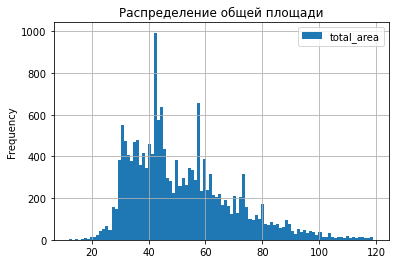

In [283]:
df_filtered.plot(kind='hist', y='total_area', bins=100, grid=True).set_title('Распределение общей площади')


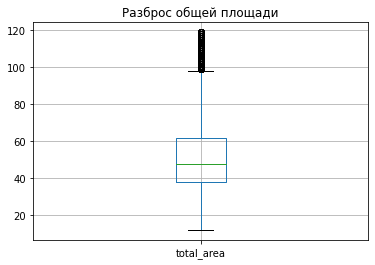

In [284]:
df_filtered.boxplot(column='total_area').set_title('Разброс общей площади')
plt.show()

Text(0.5, 1.0, 'Распределение цены')

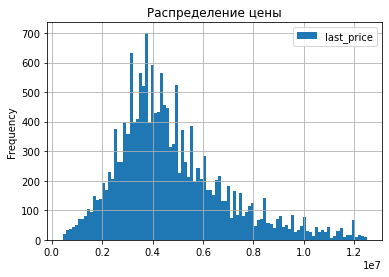

In [285]:
df_filtered.plot(kind='hist', y='last_price', bins=100, grid=True).set_title('Распределение цены')

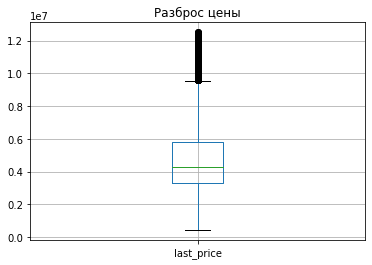

In [286]:
df_filtered.boxplot(column='last_price').set_title('Разброс цены')
plt.show()

In [287]:
# df.plot(kind='hist', y='rooms', bins=100, grid=True)

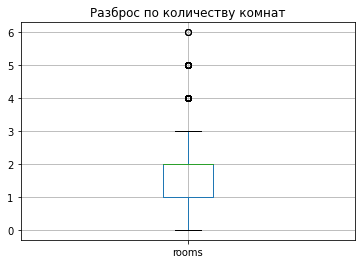

In [288]:
df_filtered.boxplot(column='rooms').set_title('Разброс по количеству комнат')
plt.show()

In [289]:
# df.plot(kind='hist', y='ceiling_height', bins=100, grid=True)

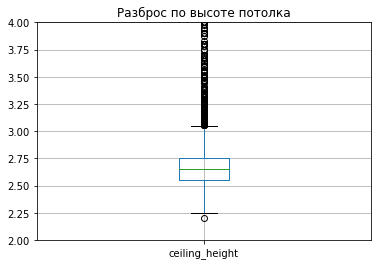

In [290]:
plt.ylim(2, 4)
df_filtered.boxplot(column='ceiling_height').set_title('Разброс по высоте потолка')
plt.show()

Изучим **время продажи квартир**.

In [291]:
df_filtered['days_exposition'] = df_filtered['days_exposition'].astype(int)

Text(0.5, 1.0, 'Распределение времени продажи')

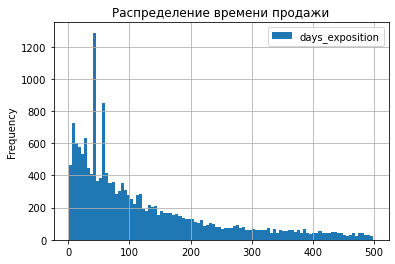

In [292]:
df_filtered.plot(kind='hist', y='days_exposition', bins=100, grid=True).set_title('Распределение времени продажи')

Text(0.5, 1.0, 'Распределение времени для сроков до 100 дней')

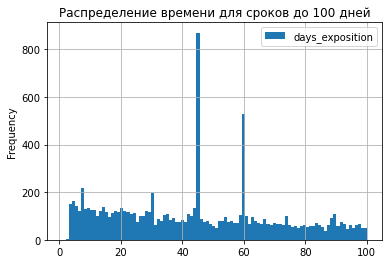

In [293]:
df_filtered.plot(kind='hist', y='days_exposition', range=(1, 100), bins=100, grid=True).set_title('Распределение времени для сроков до 100 дней')

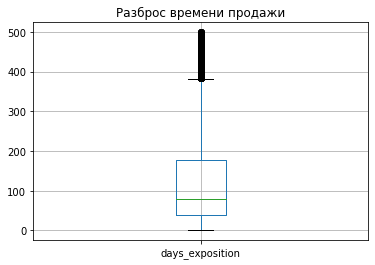

In [294]:
df_filtered.boxplot(column='days_exposition').set_title('Разброс времени продажи')
plt.show()

Чаще всего квартиру продают в течение 45 дней (первый пик). При этом медианное значение - 80, те. половина всех продаж совершается в срок менее, чем в 3 месяца. А вот среднее значение выше медианного почти в 1,5 раза - 124 дня. 

Если посмотреть на гистограмму продаж до медианы (например, до 100 дней), то аномалий слева, как нам кажется, уже нет - первые значимые продажи начинаются от 3-х дней (видимо, покупатели принимают решение примерно сразу после первых показов после размещения объявления.)

Судя по диаграмме размаха, выбросы по срокам продаж начинаются примерно от 380 дней. Т.о. мы считаем, что период в дапазоне от 3 до 400 дней - сроки продаж без выбросов. 

Изучим **зависимость**:
- цены от площади квартиры;
- цены от числа комнат;
- цены от удалённости от центра;

In [295]:
print('Корреляция цены и общей площади:', df_filtered['last_price'].corr(df_filtered['total_area']))

Корреляция цены и общей площади: 0.7095261824776861


In [296]:
print('Корреляция цены и количества комнат:', df_filtered['last_price'].corr(df_filtered['rooms']))

Корреляция цены и количества комнат: 0.45037531794748165


In [297]:
df_filtered['city_centers_nearest'].describe()

count    13113.000000
mean     15012.470678
std       8363.477575
min        208.000000
25%      10720.000000
50%      13658.000000
75%      16720.000000
max      64857.000000
Name: city_centers_nearest, dtype: float64

In [298]:
df_city_center_notnull = df_filtered[df_filtered['city_centers_nearest'].notnull()]

print('Корреляция цены и расстояния от центра:', df_city_center_notnull['last_price'].corr(df_city_center_notnull['city_centers_nearest']))

Корреляция цены и расстояния от центра: -0.349720100786749


**Выводы** после изучения этих трех факторов:
- Общая стоимость определенно **зависит** от площади квартиры, мы видимо высокую положительную корреляцию;
- Корреляция общей цены и количества комнат - **положительная, но слабая**. Видимо, увеличение площади квартиры не всегда означает увеличение количества комнат;
- Если брать все населенные пункты, то корреляция между общей стоимостью и расстоянием до центра - **отрицательная, но небольшая**. Действительно далекие от центра квартиры стоят дешевле, но закономерность не очень сильно выражена. Скорее всего эта корреляция в случае раздельного анализа петербурских квартир и областных квартир будет отличаться.

Изучим **зависимость** общей цены квартиры от категории этажа. Посмотрим на медианы и средние этих категорий.

In [299]:
df_floor_prices = pd.DataFrame({'первый': [df_filtered.loc[df_filtered['floor_category'] == 'первый', 'last_price'].mean(), df_filtered.loc[df_filtered['floor_category'] == 'первый', 'last_price'].median()],\
'последний':[df_filtered.loc[df_filtered['floor_category'] == 'последний', 'last_price'].mean(), df_filtered.loc[df_filtered['floor_category'] == 'последний', 'last_price'].median()],\
'другой': [df_filtered.loc[df_filtered['floor_category'] == 'другой', 'last_price'].mean(), df_filtered.loc[df_filtered['floor_category'] == 'другой', 'last_price'].median()]                               })

df_floor_prices = df_floor_prices.astype(int)


df_floor_prices



,первый,последний,другой
0,3983060,4453179,4932264
1,3700000,4000000,4499000


Видно, что **дороже** квартиры не первого и не последнего этажей. По крайней мере это характерно для всего жилого фонда, без разделения на петербургский и областной.

Посмотрим **зависимость** общей цены квартиры от даты размещения: дня недели, месяца и года.

In [300]:
weekday_median_mean = df_filtered.pivot_table(index='day_weekday_pub', values='last_price', aggfunc='median')

weekday_median_mean['mean'] = df_filtered.pivot_table(index='day_weekday_pub', values='last_price', aggfunc='mean').astype(int)

weekday_median_mean.columns = ['median', 'mean']

weekday_median_mean

,median,mean
day_weekday_pub,,
0,4300000,4738513
1,4300000,4797973
2,4300000,4728735
3,4300000,4781333
4,4290000,4754523
5,4300000,4702925
6,4200000,4652446


In [301]:
month_median_mean = df_filtered.pivot_table(index='month', values='last_price', aggfunc='median')

month_median_mean['mean'] = df_filtered.pivot_table(index='month', values='last_price', aggfunc='mean').astype(int)

month_median_mean.columns = ['median', 'mean']

month_median_mean

,median,mean
month,,
1,4300000,4761461
2,4300000,4725340
3,4229000,4672850
4,4350000,4823799
5,4300000,4772319
6,4150000,4611196
7,4300000,4751218
8,4340000,4833507
9,4350000,4847610


In [302]:
year_median_mean = df_filtered.pivot_table(index='year', values='last_price', aggfunc='median')

year_median_mean['mean'] = df_filtered.pivot_table(index='year', values='last_price', aggfunc='mean').astype(int)

year_median_mean.columns = ['median', 'mean']

year_median_mean

,median,mean
year,,
2015,4500000,4909355
2016,4255000,4764248
2017,4250000,4736990
2018,4300000,4708787
2019,4600000,5010182


Если говорить о дней недели или месяце - цены не почти не отличаются. 
Если говорить о годах, то и средние и медианы были чуть больше в 2015-м и 2019-м годах, а в промежутке - было "проседание" цен на квартиры. 

Выделим первую **десятку** населенных пунктов по числу объявлений. 

In [303]:
locality_name_top_10 = df_filtered['locality_name'].value_counts().head(10)

locality_name_top_10

Санкт-Петербург      11121
поселок Мурино         507
поселок Шушары         380
Всеволожск             302
поселок Парголово      286
Колпино                286
Пушкин                 262
деревня Кудрово        261
Гатчина                235
Выборг                 190
Name: locality_name, dtype: int64

In [304]:
df_locality_name_top_10 = df_filtered[df_filtered['locality_name'].isin(locality_name_top_10.index)]

df_locality_name_top_10.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,year,month,day_weekday_pub,floor_category,living_total_ratio,kitchen_total_ratio
0,7,3350000,40,2018-12-04,1,2.75,11,18,1,NaN,...,0.0,NaN,81,83750,2018,12,1,первый,0.450000,0.275000
1,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,1.0,48.0,121,100000,2018,6,1,другой,0.320000,0.410000
3,6,3700000,37,2017-11-02,1,2.66,26,10,6,NaN,...,0.0,NaN,155,100000,2017,11,3,другой,0.270270,0.378378
4,20,2900000,33,2018-05-23,1,2.70,27,15,26,NaN,...,NaN,NaN,189,87878,2018,5,2,другой,0.454545,0.242424
5,18,5400000,61,2017-02-26,3,2.50,9,43,7,NaN,...,0.0,NaN,289,88524,2017,2,6,другой,0.704918,0.098361


Посмотрим среднюю цену квадратного метра в каждом из этих населенных пунктов. Найдем "чемпионов".

In [305]:
sq_meter_top_ten = df_locality_name_top_10.pivot_table(index='locality_name', values='price_sq_meter', aggfunc='mean').astype(int)
sq_meter_top_ten

,price_sq_meter
locality_name,
Всеволожск,67086
Выборг,57367
Гатчина,68499
Колпино,74946
Пушкин,100271
Санкт-Петербург,105313
деревня Кудрово,93432
поселок Мурино,86569
поселок Парголово,89850


Text(0.5, 1.0, 'Цена за кв. метр в различных населенных пунктах')

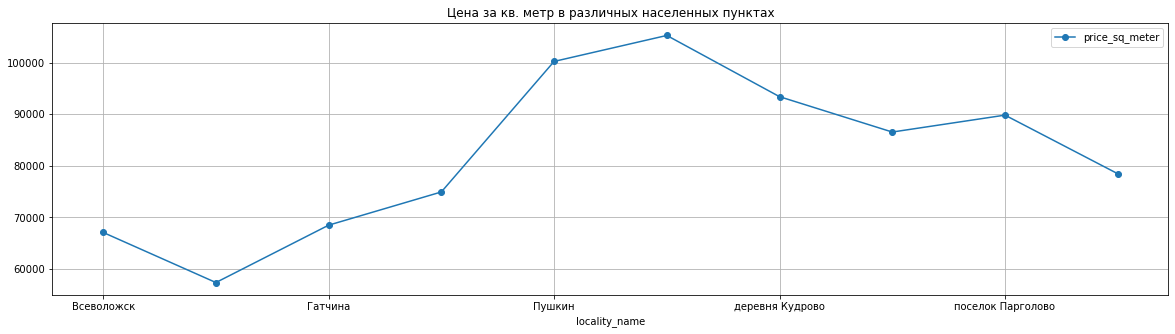

In [306]:
sq_meter_top_ten.plot(style='o-', grid=True, figsize=(20, 5)).set_title('Цена за кв. метр в различных населенных пунктах')

Населенный пункт с **максимальной** стоимостью кв. метра жилья - Санкт-Петербург.

Населенный пункт с **минимальной** стоимостью - Выборг.

Изучим цены на квартиры в центре Санкт-Петербурга. Для начала надо определить, что мы считаем "центром".

In [307]:
df_spb = df_filtered[df_filtered['locality_name'] == 'Санкт-Петербург']
df_spb = df_spb[df_spb['city_centers_nearest'].notnull()]
# df_spb

In [308]:
df_spb['city_centers_nearest_km'] = df_spb['city_centers_nearest'] / 1000
df_spb['city_centers_nearest_km'] = df_spb['city_centers_nearest_km'].astype('int64')

df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_meter,year,month,day_weekday_pub,floor_category,living_total_ratio,kitchen_total_ratio,city_centers_nearest_km
1,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,48.0,121,100000,2018,6,1,другой,0.320000,0.410000,8
5,18,5400000,61,2017-02-26,3,2.50,9,43,7,NaN,...,NaN,289,88524,2017,2,6,другой,0.704918,0.098361,15
6,5,5050000,39,2017-11-16,1,2.67,12,20,3,NaN,...,553.0,137,129487,2017,11,3,другой,0.512821,0.205128,13
11,16,4650000,39,2017-11-18,1,2.60,14,20,5,NaN,...,296.0,19,119230,2017,11,5,другой,0.512821,0.179487,14
12,11,6700000,82,2017-11-23,3,3.05,5,55,1,NaN,...,NaN,397,81707,2017,11,3,первый,0.670732,0.109756,10


Посмотрим, как цена квадратного метра меняется в зависимости от расстояния до центра СПб.

In [309]:
price_per_km = df_spb.pivot_table(index='city_centers_nearest_km', values='price_sq_meter', aggfunc='mean')

price_per_km['price_sq_meter'] = price_per_km['price_sq_meter'].astype('int64')

Text(0.5, 1.0, 'Цена за кв. метр в зависимости от расстояния до центра')

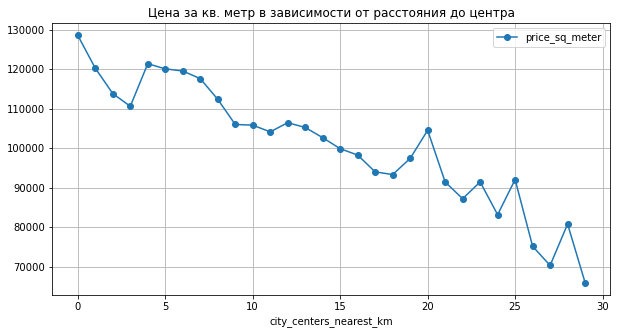

In [310]:
price_per_km.plot(style='o-', grid=True, figsize=(10, 5)).set_title('Цена за кв. метр в зависимости от расстояния до центра')

График сильно меняется после точки в 3 километра от центра. После этого цена вырастает почти до максимума, но потом уже неуклонно ползет вниз до "плато", которое начинается на 9-м километре). Видимо, это "пояс" сталинских домов и новостроек, близких к центру. Соответственно, границей центра и не-центра будем считать то, где это плато заканчивается - 13 км. 

Продолжим изучать центр СПб. Посмотрим, какие параметры характерны для этих квартир. А также, какие факторы влиют на цену квартиры.

In [311]:
df_spb_center = df_spb[df_spb['city_centers_nearest_km'] <= 13]
df_spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_meter,year,month,day_weekday_pub,floor_category,living_total_ratio,kitchen_total_ratio,city_centers_nearest_km
1,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,48.0,121,100000,2018,6,1,другой,0.320000,0.410000,8
6,5,5050000,39,2017-11-16,1,2.67,12,20,3,NaN,...,553.0,137,129487,2017,11,3,другой,0.512821,0.205128,13
12,11,6700000,82,2017-11-23,3,3.05,5,55,1,NaN,...,NaN,397,81707,2017,11,3,первый,0.670732,0.109756,10
13,8,3250000,31,2017-01-27,1,2.50,5,19,2,NaN,...,NaN,168,104838,2017,1,4,другой,0.612903,0.161290,10
15,13,3200000,31,2018-03-14,1,2.55,5,16,2,NaN,...,NaN,310,103225,2018,3,2,другой,0.516129,0.161290,9


In [312]:
df_spb_center.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,year,month,day_weekday_pub,living_total_ratio,kitchen_total_ratio,city_centers_nearest_km
count,6888.00000,6888.00000,6888.00000,6888.00000,6888.00000,6888.00000,6888.00000,6888.00000,6888.00000,6888.00000,...,6888.00000,3300.00000,6888.00000,6888.00000,6888.00000,6888.00000,6888.00000,6888.00000,6888.00000,6888.00000
mean,9.81911,5878916.92494,54.57636,1.98722,2.71759,10.82419,32.39024,5.89155,9.69411,0.49637,...,0.70427,546.73545,124.05125,109398.07564,2017.35119,6.60511,2.58479,0.58416,0.18756,9.25102
std,5.59845,2221258.88798,19.15249,0.91317,0.23130,6.14866,14.53528,4.58557,4.45767,0.78961,...,0.89613,276.04859,118.26396,24639.81509,0.86218,3.45680,1.77386,0.11891,0.07884,3.38998
min,0.00000,1190000.00000,12.00000,0.00000,2.40000,2.00000,2.00000,1.00000,0.00000,0.00000,...,0.00000,20.00000,2.00000,15384.00000,2015.00000,1.00000,0.00000,0.03846,0.00000,0.00000
25%,6.00000,4150000.00000,40.00000,1.00000,2.55000,5.00000,20.00000,3.00000,7.00000,0.00000,...,0.00000,333.00000,36.00000,92857.00000,2017.00000,3.00000,1.00000,0.50541,0.13262,7.00000
50%,9.00000,5300000.00000,51.00000,2.00000,2.65000,9.00000,30.00000,5.00000,9.00000,0.00000,...,0.00000,541.00000,81.00000,105229.50000,2017.00000,7.00000,3.00000,0.58333,0.16923,10.00000
75%,14.00000,7100698.25000,66.00000,3.00000,2.78000,16.00000,41.00000,8.00000,11.00000,1.00000,...,1.00000,757.00000,178.00000,122096.00000,2018.00000,10.00000,4.00000,0.65625,0.22857,12.00000
max,37.00000,12499000.00000,119.00000,6.00000,4.70000,52.00000,110.00000,26.00000,52.00000,4.00000,...,3.00000,1313.00000,499.00000,387096.00000,2019.00000,12.00000,6.00000,1.00000,0.78788,13.00000


In [313]:
df_filtered.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,year,month,day_weekday_pub,living_total_ratio,kitchen_total_ratio
count,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,...,5392.00000,13113.00000,6260.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000,17327.00000
mean,9.53593,4748706.29786,51.76580,1.87644,2.67818,10.98159,30.54129,6.00923,9.45871,0.54597,...,486.08680,0.69992,536.40000,124.09159,92498.15617,2017.36781,6.59982,2.59081,0.58026,0.19346
std,5.54096,2177721.35260,17.78726,0.88063,0.18986,6.69345,13.71147,4.95981,4.20760,0.81538,...,326.56744,0.88338,275.02833,117.60984,29084.24584,0.84390,3.48642,1.78949,0.12400,0.08172
min,0.00000,430000.00000,12.00000,0.00000,2.20000,1.00000,2.00000,1.00000,0.00000,0.00000,...,1.00000,0.00000,13.00000,1.00000,7962.00000,2015.00000,1.00000,0.00000,0.03846,0.00000
25%,6.00000,3300000.00000,38.00000,1.00000,2.55000,5.00000,18.00000,2.00000,7.00000,0.00000,...,288.00000,0.00000,325.75000,40.00000,75641.00000,2017.00000,3.00000,1.00000,0.50000,0.13559
50%,9.00000,4300000.00000,48.00000,2.00000,2.65000,9.00000,29.00000,4.00000,9.00000,0.00000,...,453.00000,0.00000,526.00000,80.00000,93000.00000,2017.00000,7.00000,3.00000,0.57500,0.17647
75%,13.00000,5800000.00000,62.00000,2.00000,2.75000,16.00000,39.00000,8.00000,11.00000,1.00000,...,612.00000,1.00000,745.25000,177.00000,109038.00000,2018.00000,10.00000,4.00000,0.65385,0.23881
max,39.00000,12499000.00000,119.00000,6.00000,4.70000,60.00000,110.00000,33.00000,64.00000,4.00000,...,3190.00000,3.00000,1344.00000,499.00000,387096.00000,2019.00000,12.00000,6.00000,1.00000,0.91304


Изучим в центре СПб зависимость цены от:

- площади квартиры;
- числа комнат;
- удалённости от центра;
- этажа;
- года размещения;
- месяца размещения;

In [314]:
print('Зависимость цены от площади в центре СПб:', df_spb_center['last_price'].corr(df_spb_center['total_area']))
print('Зависимость цены от количества комнат в центре СПб:', df_spb_center['last_price'].corr(df_spb_center['rooms']))
print('Зависимость цены от расстояния до центра в центре СПб:', df_spb_center['last_price'].corr(df_spb_center['city_centers_nearest_km']))

Зависимость цены от площади в центре СПб: 0.8014407023319331
Зависимость цены от количества комнат в центре СПб: 0.49366378924884874
Зависимость цены от расстояния до центра в центре СПб: -0.3729955202970946


In [315]:
df_spb_center_floor_prices = pd.DataFrame({'первый': [df_spb_center.loc[df_filtered['floor_category'] == 'первый', 'last_price'].mean(), df_spb_center.loc[df_filtered['floor_category'] == 'первый', 'last_price'].median()],\
'последний':[df_spb_center.loc[df_spb_center['floor_category'] == 'последний', 'last_price'].mean(), df_spb_center.loc[df_filtered['floor_category'] == 'последний', 'last_price'].median()],\
'другой': [df_spb_center.loc[df_spb_center['floor_category'] == 'другой', 'last_price'].mean(), df_spb_center.loc[df_filtered['floor_category'] == 'другой', 'last_price'].median()]})

df_spb_center_floor_prices = df_spb_center_floor_prices.astype(int)


df_spb_center_floor_prices

,первый,последний,другой
0,5170774,5898732,5977084
1,4800000,5250000,5490000


In [316]:
spb_year_median_mean = df_spb_center.pivot_table(index='year', values='last_price', aggfunc='median')

spb_year_median_mean['mean'] = df_spb_center.pivot_table(index='year', values='last_price', aggfunc='mean').astype(int)

spb_year_median_mean.columns = ['median', 'mean']

spb_year_median_mean

,median,mean
year,,
2015,5250000,5639300
2016,5405000,5910629
2017,5250000,5859155
2018,5370000,5909246
2019,5500000,5866233


In [317]:
spb_month_median_mean = df_spb_center.pivot_table(index='month', values='last_price', aggfunc='median')

spb_month_median_mean['mean'] = df_spb_center.pivot_table(index='month', values='last_price', aggfunc='mean').astype(int)

spb_month_median_mean.columns = ['median', 'mean']

spb_month_median_mean

,median,mean
month,,
1,5300000,5926940
2,5250000,5805433
3,5490000,5875259
4,5400000,5942660
5,5300000,5857173
6,5200000,5757963
7,5200000,5845707
8,5400000,5899590
9,5540000,6146154


**Выводы** по квартирам центра Санкт-Петербурга:
- к центральным мы отнесли квартиры на расстоянии не более **13-х километров** от центра;
- общая цена квартиры **зависит** от площади - положительная высокая корреляция;
- общая цена квартиры **слабо зависит** от количества комнат.
- в пределах центра колебание общих цен почти **не заметно**: есть слабая отрицательная корреляция.  При этом на графике "стоимости километра" такая зависимость видна - с удалением от центра СПб цена квадратного метра падает.
- самые дешевые квартиры в центре СПб - на **первых этажах**, при этом цены последних этажей и не-первых почти не отличаются. И в этом отличие от общей базы.
- В 2016-м году был небольшой **скачок** в общей цене на квартиры, потом спад и плавный рост общей цены. И эта кривая отличается от U-образной кривой цен из общей базы. 
- Как и в общей базе цена **не очень сильно** зависит от месяца продажи. 


## Общий вывод

Подведем **итоги исследовательского анализа** данных рынка недвижимости Санкт-Петербурга и Ленинградской области.
1) Факторы **влияющие** на стоимость квартиры:
- Площадь квартиры;
- Удаленность от Петербурга (чем дальше от "второй столицы", тем ниже общая стоимость квартиры), а максимальные цены - в центре СПб. 
- Этаж квартиры (причем в общей базе дешевле квартиры первого и последнего этажей, а в центре СПб - дешевле всего первый этаж, а последний примерно равен не-первым этажам.) 
- Есть определенные отличия цен для разных периодов размещения объявлений (в рамках 2015-2019 гг.) В общей базе мы видим U-образную кривую цен, а в СПб - скачок в 2016-м, потом спад и плавный рост цены.

2) Факторы, **не влияющие** на стоимость или имеющие слабую корреляцию со стоимостью:
- Количество комнат;
- Расстояние до центра населенного пункта, если смотреть данные по общей базе; 
- день недели и месяц размещения объявления; 

3) Отдельно отметим факторы, **характерные для Петербурга и его центра**:
- В Петербурге продается примерно половина всех объектов базы недвижимости;
- Расстояние от центра города влияет на стоимость квадратного метра (она падает почти вдвое по мере удаления от центра); 
- Дороже всего квартиры на последних этажах и не-первых этажах;